# Bis438 Final Project Problem 2

## Import Python Libraries

In [1]:
import tensorflow as tf
import numpy as np
import deepchem as dc

from model import GCN
from utils import process_prediction

/home/baseline/.conda/envs/test/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Build GraphConv Model

In [2]:
batch_size = 50
model = GCN(batch_size=batch_size) # build model

## Training GraphConv Model and Calculate ROC-AUC

In [3]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean, mode="classification") # define metric as roc_auc_score

num_models = 10 # the number of iteration
rocauc_train = [] # save rocauc value for training dataset
rocauc_valid = [] # save rocauc value for validation dataset
rocauc_test = [] # save rocauc value for test dataset

for i in range(num_models):
    # Load ith dataset with GraphConv Featurizer and random split
    hiv_tasks, hiv_datasets, transformers = dc.molnet.load_hiv(featurizer='GraphConv',split='random', reload=False)
    train_dataset, valid_dataset, test_dataset = hiv_datasets
    
    # Fitting ith model with training dataset
    model.fit(train_dataset, 3) # fitting with training epoch 3
    
    # Evaluating model   
    # save rocauc for training dataset
    pred_train = model.predict(train_dataset)
    pred_train = process_prediction(train_dataset.y, pred_train)
    train_scores = metric.compute_metric(train_dataset.y, pred_train, train_dataset.w)
    rocauc_train.append(train_scores)

    # save rocauc for valid dataset
    pred_valid = model.predict(valid_dataset)
    pred_valid = process_prediction(valid_dataset.y, pred_valid)
    valid_scores = metric.compute_metric(valid_dataset.y, pred_valid, valid_dataset.w)
    rocauc_valid.append(valid_scores)
   
    # save rocauc for test dataset
    pred_test = model.predict(test_dataset)
    pred_test = process_prediction(test_dataset.y, pred_test)
    test_scores = metric.compute_metric(test_dataset.y, pred_test, test_dataset.w)
    rocauc_test.append(test_scores)   
    
    # print rocauc result
    print("Evaluating model number ", i)
    print("Train ROC-AUC Score: " , train_scores,  
          "Valid ROC-AUC Score: " , valid_scores,
          "Test ROC-AUC Score: " , test_scores)    

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/HIV.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 14.179 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 14.934 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 took 13.931 s
Loading shard 4 of size 8192.
Featurizing sample 0
Featuri

/home/baseline/.conda/envs/test/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


computed_metrics: [0.8021338279633644]
computed_metrics: [0.7660185944763469]
computed_metrics: [0.7560438687666398]
Evaluating model number  0
Train ROC-AUC Score:  0.8021338279633644 Valid ROC-AUC Score:  0.7660185944763469 Test ROC-AUC Score:  0.7560438687666398
Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/HIV.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 12.666 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 1 took 13.470 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Fe

Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 4 took 14.227 s
Loading shard 6 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 5 took 0.394 s
TIMING: dataset construction took 80.727 s
Loading dataset from disk.
TIMING: dataset construction took 16.924 s
Loading dataset from disk.
TIMING: dataset construction took 14.983 s
Loading dataset from disk.
TIMING: dataset construction took 7.066 s
Loading dataset from disk.
TIMING: dataset construction took 6.585 s
Loading dataset from disk.
computed_metrics: [0.9049185248835484]
computed_metrics: [0.8403540948690263]
computed_metrics: [0.8117446902149994]
Evaluating model number  4
Train ROC-AUC Score:  0.9049185248835484 Valid ROC-AUC Score:  0.8403540948690263 Test ROC-AUC Score:  0.8117446902149994
Loading raw samples now.
shard_size: 8192
About to start loa

TIMING: featurizing shard 1 took 13.591 s
Loading shard 3 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 2 took 14.139 s
Loading shard 4 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 3 took 14.042 s
Loading shard 5 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 4 took 14.664 s
Loading shard 6 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 5 took 0.397 s
TIMING: dat

## Calculate mean value of ROC-AUC and use std1 for error bar

In [4]:
values = []
values.append(np.mean(rocauc_train))
values.append(np.mean(rocauc_valid))
values.append(np.mean(rocauc_test))
stds = []
stds.append(np.std(rocauc_train))
stds.append(np.std(rocauc_valid))
stds.append(np.std(rocauc_test))

## Plot ROC-AUC Score

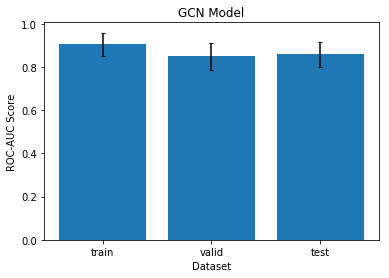

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
topics = ['train', 'valid', 'test']
plt.bar(topics, values, yerr=stds, capsize=2)

plt.title('GCN Model')
plt.xlabel('Dataset')
plt.ylabel('ROC-AUC Score')
plt.show()